In [1]:
import numpy as np
from itertools import combinations
from scipy import stats
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

### Задание 1

Дана матрица объект-признак:

In [2]:
X = [[1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной:

In [3]:
y = [9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

In [4]:
X = np.array(X)
y = np.array(y)

$$b = (X^\top X)^{-1} X^\top Y$$

$$\varepsilon = y - x \cdot b$$

$$R^2 = 1 - \dfrac{D(\varepsilon)}{D(y)}$$

In [5]:
def R2(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    XTX = X.T.dot(X)
#     print('Определитель XTX =', np.linalg.det(XTX))
    b = np.linalg.inv(XTX).dot(X.T).dot(y)
    e = y - X.dot(b)
    return 1 - e.var() / y.var()

In [6]:
R2(X, y)

1.0

In [7]:
for i, j in combinations(range(X.shape[1]), 2):
    print('\nВыбранные признаки:', i + 1, j + 1)
    print('R2 =', R2(X[:, [i, j]], y))


Выбранные признаки: 1 2
R2 = 0.18113594742585215

Выбранные признаки: 1 3
R2 = 0.7634246238793152

Выбранные признаки: 1 4
R2 = 0.4532966783144077

Выбранные признаки: 2 3
R2 = 0.547948273403901

Выбранные признаки: 2 4
R2 = 0.6062055761129931

Выбранные признаки: 3 4
R2 = 0.622441987650532


Пара признаков 1 и 3 дает налучший результат для модели линейной регрессии

$$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)}$$

In [8]:
n = X.shape[0]
m = 2

$$\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right)$$

In [9]:
k1 = m
k2 = n - m - 1

R2 = R2(X[:, [0, 2]], y) # 1 и 3 признаки

F = (R2 / k1) / ((1 - R2) / k2)
F

11.29443912292265

In [10]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Cтатистика попадает в критическую область => нулевая гипотеза отвергается, уравнение линейной регресcии признается значимым

### Задание 2

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

In [11]:
A_all = 2509
A_buy = 77
B_all = 1465
B_buy = 60

In [12]:
y1 = np.concatenate([np.ones(A_buy), np.zeros(A_all - A_buy)])
y2 = np.concatenate([np.ones(B_buy), np.zeros(B_all - B_buy)])
y = np.concatenate([y1, y2])

In [13]:
n1, n2, n = y1.shape[0], y2.shape[0], y.shape[0]

n1, n2, n

(2509, 1465, 3974)

$$SS_b = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i, \:\:
SS_w = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2,$$

In [14]:
SS_b = n1 * (y1.mean() - y.mean()) ** 2 + n2 * (y2.mean() - y.mean()) ** 2
SS_w = ((y1 - y1.mean()) ** 2).sum() + ((y2 - y2.mean()) ** 2).sum()

SS_b, SS_w

(0.09748158004016791, 132.17956925035745)

$$\sigma_b^2 = \dfrac{SS_b}{k - 1}, \:\: \sigma_w^2 = \dfrac{SS_w}{n - k}$$

In [15]:
k = 2
k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(0.09748158004016791, 0.03327783717279895)

$$F = \dfrac{\sigma_b^2}{\sigma_w^2}$$

In [16]:
F = sigma2_b / sigma2_w

F

2.9293243889013496

$$\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right),$$

In [17]:
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)

t

3.8438010503414866

In [18]:
F > t

False

Значение статистики не попало в критическую область, следовательно, отличие конверсии на страницах A и B статистически значимым не является

### Задание 3

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

In [19]:
quartet = {
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

По каждой паре выборок посчитайте:

1. выборочное среднее и дисперсию каждой выборки,
2. коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

In [20]:
for i in range(1, 5):
    print(f'Выборочное среднее x{i}:', np.mean(quartet[f'x{i}']))

Выборочное среднее x1: 9.0
Выборочное среднее x2: 9.0
Выборочное среднее x3: 9.0
Выборочное среднее x4: 9.0


In [21]:
for i in range(1, 5):
    print(f'Выборочное среднее y{i}:', np.mean(quartet[f'y{i}']))

Выборочное среднее y1: 7.500909090909093
Выборочное среднее y2: 7.50090909090909
Выборочное среднее y3: 7.5
Выборочное среднее y4: 7.500909090909091


In [22]:
for i in range(1, 5):
    print(f'Дисперсия x{i}:', np.var(quartet[f'x{i}'], ddof=1))

Дисперсия x1: 11.0
Дисперсия x2: 11.0
Дисперсия x3: 11.0
Дисперсия x4: 11.0


In [23]:
for i in range(1, 5):
    print(f'Дисперсия y{i}:', np.var(quartet[f'y{i}'], ddof=1))

Дисперсия y1: 4.127269090909091
Дисперсия y2: 4.127629090909091
Дисперсия y3: 4.12262
Дисперсия y4: 4.123249090909091


In [24]:
for i in range(1, 5):
    print(f'Коэффициент корреляции Пирсона x{i} и y{i}:', np.corrcoef(quartet[f'x{i}'], quartet[f'y{i}'])[0, 1])

Коэффициент корреляции Пирсона x1 и y1: 0.81642051634484
Коэффициент корреляции Пирсона x2 и y2: 0.8162365060002428
Коэффициент корреляции Пирсона x3 и y3: 0.8162867394895984
Коэффициент корреляции Пирсона x4 и y4: 0.8165214368885028


In [25]:
for i in range(1, 5):
    cov = np.cov(quartet[f'x{i}'], quartet[f'y{i}'])
    b = cov[0, 1] / cov[0, 0]
    a = np.mean(quartet[f'y{i}']) - b * np.mean(quartet[f'x{i}'])
    print(f'Уравнение прямой линейной регрессии x{i} и y{i}: Y = {a:.4f} * X + {b:.4f}')

Уравнение прямой линейной регрессии x1 и y1: Y = 3.0001 * X + 0.5001
Уравнение прямой линейной регрессии x2 и y2: Y = 3.0009 * X + 0.5000
Уравнение прямой линейной регрессии x3 и y3: Y = 3.0025 * X + 0.4997
Уравнение прямой линейной регрессии x4 и y4: Y = 3.0017 * X + 0.4999


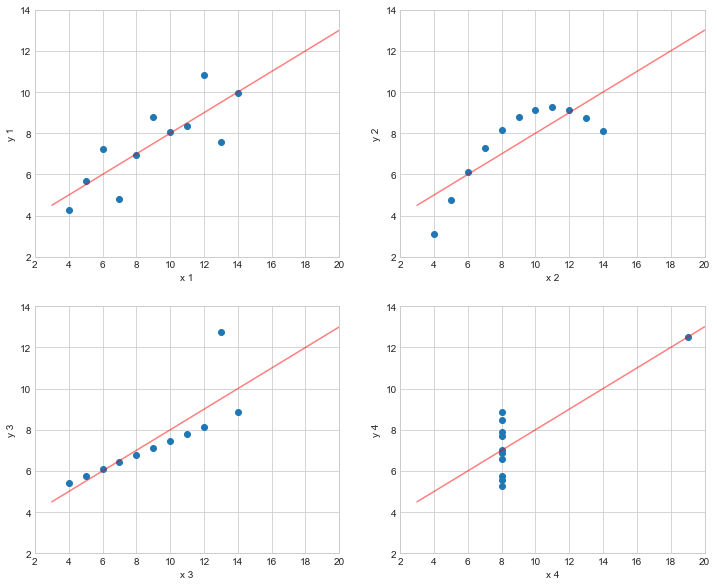

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
fig.subplots_adjust(wspace=0.2, hspace=0.2)

ox = np.linspace(3, 20, 100)

for i, ax in enumerate(axes.flatten()):
    i += 1
    
    cov = np.cov(quartet[f'x{i}'], quartet[f'y{i}'])
    b = cov[0, 1] / cov[0, 0]
    a = np.mean(quartet[f'y{i}']) - b * np.mean(quartet[f'x{i}'])
    
   
    ax.scatter(quartet[f'x{i}'], quartet[f'y{i}'])
    ax.plot(ox, a + b * ox, color='red', alpha=0.5)
    
    ax.set_xlabel(f'x {i}')
    ax.set_ylabel(f'y {i}')
    
    ax.set_xlim(2, 20)
    ax.set_ylim(2, 14)
    